# Linear Algebra: MIT OCW 18.06

## 1. The Geometry of Linear Equation

Consider the following system of equations:

$$ 2x-y=0 $$
$$ -x+2y=3 $$

Converting the above system into the matrix form ***Ax=b***

$$
 \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}
 \begin{bmatrix} x \\ y \end{bmatrix} =
 \begin{bmatrix} 0 \\ 3 \end{bmatrix} 
$$

This is *2x2* system

1. The following is the **Row Picture** of the of the linear system. It is used to create lines in the plane.

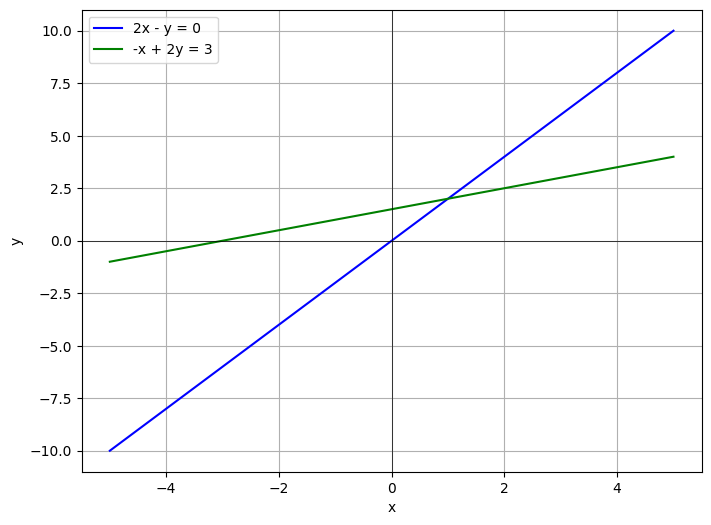

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-5, 5)

# Define the lines
y1 = 2 * x                     # from 2x - y = 0
y2 = 0.5 * x + 1.5             # from -x + 2y = 3

# Plot the lines
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='2x - y = 0', color='blue')
plt.plot(x, y2, label='-x + 2y = 3', color='green')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)  # x-axis
plt.axvline(0, color='black', linewidth=0.5)  # y-axis
plt.grid(True)
plt.legend()

plt.show()


2. The following is the **Column Picture** of the linear system. It is used to create vectors in the plane.

$$
 x \begin{bmatrix} 2 \\ -1 \end{bmatrix} +
 y \begin{bmatrix} -1 \\ 2 \end{bmatrix} =
   \begin{bmatrix} 0 \\ 3 \end{bmatrix} 
$$

which is a linear combination of the columns of matrix *A*

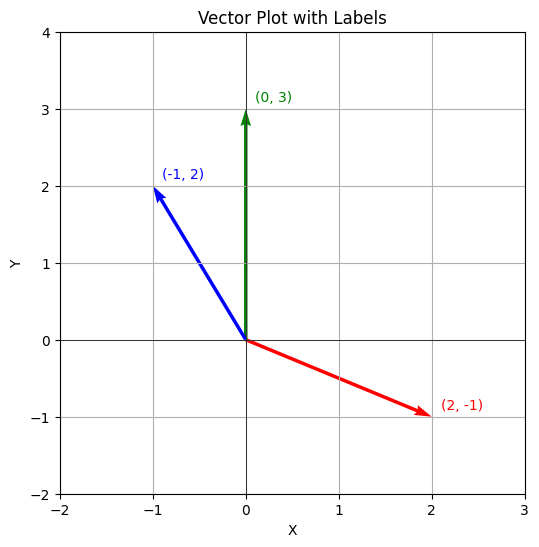

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define vectors
v1 = np.array([2, -1])
v2 = np.array([0, 3])
v3 = np.array([-1, 2])

# Origin point for all vectors
origin = np.array([[0, 0, 0], [0, 0, 0]])  # x and y origins for each vector

# Stack vectors for plotting
vectors = np.array([v1, v2, v3]).T

# Create plot
plt.figure(figsize=(6, 6))
plt.quiver(*origin, *vectors, angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b'])

# Label vector endpoints
endpoints = [v1, v2, v3]
labels = ['(2, -1)', '(0, 3)', '(-1, 2)']
colors = ['r', 'g', 'b']

for vec, label, color in zip(endpoints, labels, colors):
    plt.text(vec[0] + 0.1, vec[1] + 0.1, label, color=color, fontsize=10)

# Set axis limits
plt.xlim(-2, 3)
plt.ylim(-2, 4)

# Add grid and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
# plt.gca().set_aspect('equal')  # Uncomment if equal scaling is desired
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Vector Plot with Labels")

# Show plot
plt.show()


The **Row Picture** gives rise to a line for 2D and plane for 3D which becomes difficult to visualize and understand as we move to higher dimensions. On the other hand, the **Column Picture** leads to vectors which are easier to manipulate and understand. Thus, moving forward we will focus on the **Column Picutre**.

Big Questions: Can I solve ***Ax=b*** for every b?
Which is equivalent to asking "Do the linear combinations of the columns of A fill the entire space?

If the answer is yes -> The columns of matrix ***A*** are linearly independent -> The matrix ***A*** is non-singular -> The matrix ***A*** is invertible.

If the answer is no -> The columns of matrix ***A*** are linearly dependent -> The matrix ***A*** is singular -> The matrix ***A*** is not invertible.

***About Matrix multiplication***

For a matrix ***A*** and vector ***v***,

1. ***Ax*** refers to multiplying column-wise:
$$
\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} 
$$
 is equivalent to
$$
x \begin{bmatrix} 2 \\ -1 \end{bmatrix} +
y \begin{bmatrix} -1 \\ 2 \end{bmatrix}
$$

2. ***xA*** refers to multiplying row-wise:
$$
 \begin{bmatrix} x \\ y \end{bmatrix}
 \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix} 
 $$
 is equivalent to
 $$
 x \begin{bmatrix} 2 & -1 \end{bmatrix} +
 y \begin{bmatrix} -1 & 2 \end{bmatrix}
$$

## 2. Elimination with Matrices

A standard method used by all commercial solvers to solve systems of equations. The idea is to convert the pivots (elements under which all other are 0) into 1 and turn the mathrix ***A*** in to U (upper triangular) and use back-substitution.

Consider the following matrix: 
$$
A = \begin{bmatrix} 1 & 2 & 1 \\ 3 & 8 & 1 \\ 0 & 4 & 1 \end{bmatrix}
$$

To convert it into an upper trianlgular matrix, we will multiply ***A*** with elimination matrices on the left in a particular order. Elimination matrix E<sub>23</sub> denotes the matrix required to convert the element of ***A*** in Row 2 and Column 3 into 1, making it a pivot. 

We multiply A first with E<sub>21</sub> and then with E<sub>32</sub> to get the martix U.

$$
E_{32} \, E_{21} \, A = U
$$ 

$$
U = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 2 & -2 \\ 0 & 0 & 5 \end{bmatrix}
$$

Note: The determinant of A is equal to the product of its pivots in upper triangular form (U)

Permutation Matrices (***P***): These are used to change the order of the rows/columns of ***A***

a. To change rows, multiply P on the left of A
$$
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} a & b \\ c & d \end{bmatrix} =
\begin{bmatrix} c & d \\ a & b \end{bmatrix}
$$

b. To change columns, multiply P on the right of A
$$
 \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} =
\begin{bmatrix} b & a \\ d & c \end{bmatrix}
$$

## 3. Matrix Multiplication

Methods to multiply two matrices ***A*** and ***B***

$$
A_{mn} \, B_{np} \, = C_{mp}
$$

1. Row and Column Picture: 

    $C_{ab}$ = Row a of ***A*** * Column b of ***B***

2. Column Picture: Columns of C are combinations of columnes of A

3. Row Picture: Rows of C are combinations of rows of B

4. Column and Row Picture: 

    $C_{ab}$ = Column a of ***A*** * Row b of ***B***

5. Block Multiplication: Divide a matrix into smaller block matrices and then perform multiplication

 $$
 \begin{bmatrix} A_{1} & A_{2} \\ A_{3} & A_{4} \end{bmatrix} \begin{bmatrix} B_{1} & B_{2} \\ B_{3} & B_{4} \end{bmatrix} = 
 \begin{bmatrix} A_{1}B_{1} + A_{2}B_{3} & A_{1}B_{2} + A_{2}B_{4} \\ A_{3}B_{1} + A_{4}B_{3} & A_{3}B_{2} + A_{4}B_{4} \end{bmatrix} 
 $$

#### Gauss-Jordan Method
<p> The Gauss method involves reducing the matrix A to its pivot form, solving the last equation and then back-substituting to find the values of other unknowns. 

While in Gauss-Jordan, we augment the idenitiy matrix and then further reduce the pivot matrix into the identity matrix to find the inverse of <b>A</b>.
</p>

$$
\text{The matrix } \begin{bmatrix} A & \mid & I \end{bmatrix} \text{ is transformed to } \begin{bmatrix} I & \mid & A^{-1} \end{bmatrix}
$$

The transformation is carried out using the matrix E which is the multiplication of all the elimination matrices.
$$
E_{12} \, E_{23} \, E_{33} \, ... = E 
$$

$$
E \begin{bmatrix} A & \mid & I \end{bmatrix} = \begin{bmatrix} I & \mid & A^{-1} \end{bmatrix}
$$

If we focus on the latter part, 

$$
EA = I
$$
Which implies that
$$
E = A^{-1}
$$

#### Matrix Rules

Inverse of Product of Matrices

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

$$
(AB)(B^{-1}A^{-1}) = A(BB^{-1})A^{-1} = A(I)A^{-1} = AA^{-1} = I
$$

Transpose of Matrices

$$
(AA^{-1})^{T} = I^{T}
$$

$$
(AA^{-1})^{T} = I = (A^{-1})^{T}A^{T}
$$

$$
(A^{T})^{-1} = (A^{-1})^{T}
$$

## 4. Factorisation in A=LU

Consider the operation of factorizing matrix ***A*** into its lower and upper triangular matrices

$$
A \text{ is transformed into L and U}
$$

$$
A = L \,U
$$

Using the Elimination matrices, we can transform ***A*** into ***U***

$$
E_{31} \, E_{32} \, E_{21} \, A = U
$$

By inverting the elementary matrices, we can find L

$$
A = {E_{21}}^{-1} \, {E_{32}}^{-1} \, {E_{31}}^{-1} \, U
$$

Here the product of the elemntary matrices is L, the lower triangular matrix.

$$
{E_{21}}^{-1} \, {E_{32}}^{-1} \, {E_{31}}^{-1} \, = L
$$

Furthermore, the upper triangular matrix with pivot elements can be factorized into the diagonal matrix and upper triangular matrix with 1's at the pivot positions. Consider the following example of ***A*** = ***LU*** :

$$
\begin{bmatrix} 2 & 1 \\ 8 & 7 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 4 & 1 \end{bmatrix} \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix}
$$

Now the ***U*** can be further decomposed into the following:

$$
\begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 1 & 1/2 \\ 0 & 1 \end{bmatrix}
$$

Thus, the entire ***A*** = ***LU*** can be written as ***A*** = ***LDU***, where ***D*** is the diagonal matrix

$$
\begin{bmatrix} 2 & 1 \\ 8 & 7 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 4 & 1 \end{bmatrix} \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 1 & 1/2 \\ 0 & 1 \end{bmatrix}
$$

How many operations are required to factorise a nxn matrix ***A***?
Assuming one multiplication and then one subtraction, we require n<sup>2</sup> for the first pivot, (n-1)<sup>2</sup> for the second pivot, ..., 1<sup>2</sup> for the last pivot, thus, the total number of operations required is:

$$
n^{2}+(n-1)^{2}+(n-2)^{2}+ ... + 2^{2}+1^{2}+ = \frac{n(n+1)(2n+1)}{6} \sim \mathcal{O}(n ^{3})
$$

## 5. Transposes, Permutations, Spaces R<sup>n</sup>

#### Permutation Matrices, P
P is an identity matrix with reordered rows. These are matrices that execute row exchanges. For P<sub>nn</sub>, there are $n!$ possible re-orderings, thus, $n!$ possible permutation matrices.

Permuations of I<sub>33</sub>
$$
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}, \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix}, \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}
$$

The ***A*** = ***LU*** becomes ***PA*** = ***LU*** with row exchanges

All the permutation matrices are invertible:

$$
P^{-1} = P^{T} \text{ which implies } PP^{T} = P^{T}P = I
$$

#### Transpose

Consider the rectangular matrix R<sub>2x3</sub> :

$$
\begin{bmatrix} 1 & 2 & 4 \\ 3 & 3 & 1 \end{bmatrix}_{2 \text{x} 3}
$$

The transpose, R<sup>T</sup> will be: 

$$
R^{T} = \begin{bmatrix} 1 & 3 \\ 2 & 3 \\ 4 & 1 \end{bmatrix}_{3 \text{x} 2}
$$

Thus, for a matrix ***A***, the elements are replaced as:

$$
A^{T}_{ij} = A_{ji}
$$

R<sup>T</sup>R is always symmetric:

$$
\begin{bmatrix} 1 & 3 \\ 2 & 3 \\ 4 & 1 \end{bmatrix} \begin{bmatrix} 1 & 2 & 4 \\ 3 & 3 & 1 \end{bmatrix} = \begin{bmatrix} 10 & 11 & 7 \\ 11 & 13 & 11 \\ 7 & 11 & 17 \end{bmatrix}
$$

In [3]:
import numpy as np

A = np.array([
    [1, 3],
    [2, 3],
    [4, 1]
])

B = np.array([
    [1, 2, 4],
    [3, 3, 1]
])

# Perform matrix multiplication
C = A @ B 

# Print the result
print("Result of A * B:")
print(C)


Result of A * B:
[[10 11  7]
 [11 13 11]
 [ 7 11 17]]


Proof that R<sup>T</sup>R is always symmetric :

$$
(R^{T}R)^T = R^{T}(R^{T})^{T} = R^{T}R
$$

#### Vector Spaces
R<sup>2</sup> -> All 2D real vectors $ \begin{bmatrix} 3 & 2 \end{bmatrix}^{T}, \begin{bmatrix} 0 & 0 \end{bmatrix}^{T} $

R<sup>3</sup> -> All column vectors with 3 components $ \begin{bmatrix} 3 & 2 & 5 \end{bmatrix}^{T}, \begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^{T} $

R<sup>n</sup> -> All column vectors with n components $ \begin{bmatrix} 3 & 2 & 5 & ... & 8 \end{bmatrix}^{T}, \begin{bmatrix} 0 & 0 & 0 & ... & 0 \end{bmatrix}^{T} $

In a vector space, we can perform addition and scalar multiplication, and these should follow some decent rules.

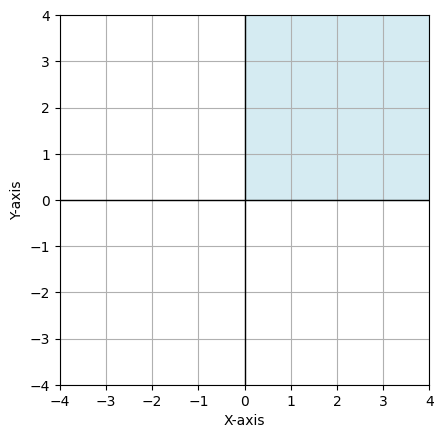

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot area
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Shade the first quadrant (x > 0, y > 0)
x = np.linspace(0, 4, 500)
y = np.linspace(0, 4, 500)
X, Y = np.meshgrid(x, y)
ax.fill_between(x, 0, 4, color='lightblue', alpha=0.5)

# Draw x and y axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Label axes and show grid
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.grid(True)

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


A vector space ***V*** being closed under an operation ***@*** translates to the fact that when ***@*** is applied to two vectors, V<sub>1</sub> and V<sub>2</sub> belonging to ***V***, then the result of the operation also lies in ***V***.

$$
\text{ if } V_{1}, V_{2} \text{ } \varepsilon \text{ } V \text{ and } V_{1} @ V_{2} \text{ } \varepsilon \text{ } V \implies \text{V is closed under @}
$$

Consider the above region ***R***,

$$
(x,y) \text{ such that } x>0 \text{ and } y>0 
$$

is not a vector space:
<p>

1. Any two vectors lying in R will always add and give a vector lying in R; thus, R is closed under addition.

2. Any vector lying in R, multiplied with a negative scalar will result in a vector that doesn't lie R; thus, R is not closed under multiplication.

Thus, we can conclude that the region R is not a vector space.
</p>

#### A vector space inside R<sup>2</sup>

Any line ***A*** in ***R<sup>2</sup>*** passing through $ \begin{bmatrix} 0 & 0 \end{bmatrix}^{T} $ will be a valid subspace of R<sup>2</sup> as :
1. We can add two vectors in ***A*** and end up in ***A***
2. We can multiply any vector in ***A*** by a scalar and end up in ***A***

Every subspace of ***R<sup>2</sup>*** must include the ***0*** vector.

***B*** is not a subspace of ***R<sup>2</sup>*** as if we multiply any vector in ***B*** by 0 (a scalar), we will end up out of ***B***.

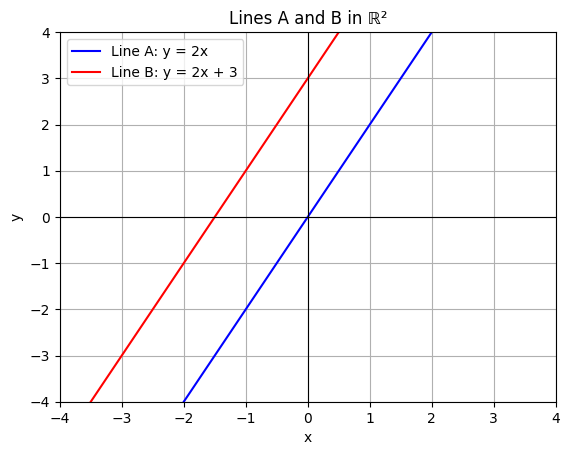

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define x range
x = np.linspace(-4, 4, 40)

# Line A: Passes through origin
y_A = 2 * x

# Line B: Does not pass through origin
y_B = 2 * x + 3

# Plot both lines
plt.plot(x, y_A, label='Line A: y = 2x', color='blue')
plt.plot(x, y_B, label='Line B: y = 2x + 3', color='red')

# Add origin axes
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

# Set axis limits
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Labels, grid, and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lines A and B in ℝ²")
plt.grid(True)
plt.legend()

# Show plot
plt.show()

Subspaces of ***R<sup>2</sup>*** :
1. All of ***R<sup>2</sup>***
2. Any line through $ \begin{bmatrix} 0 & 0 \end{bmatrix}^{T} $
3. Zero vector only, ***~~Z~~***

Subspaces of ***R<sup>3</sup>*** :
1. All of ***R<sup>3</sup>***
2. Any plane through $ \begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^{T} $

3. Any line through $ \begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^{T} $
4. Zero vector only, ***~~Z~~***

### Columns in ***R<sup>3</sup>***

Consider the matrix ***A*** :
$$
A = \begin{bmatrix} 1 & 3 \\ 2 & 3 \\ 4 & 1 \end{bmatrix}
$$

All the combinations of the columns of ***A*** form a subspace called the Columnspace, ***C(A)***

The columns of ***A*** fill (span) an entire plane in ***R<sup>3</sup>***. This plane contains all the linear combinations of Col1 and Col2 and passes through $ \begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^{T} $. Thus ***A*** is closed under addition and multiplicaiton $ \implies $ ***A*** is a subspace of ***R<sup>3</sup>***.

## 6. Column and Null Space

Consider the following two subspaces of ***R<sup>3</sup>*** :

Plane ***P*** through $ \begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^{T} $ is a subspace of ***R<sup>3</sup>*** .

Line ***L*** through $ \begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^{T} $ is a subspace of ***R<sup>3</sup>*** .


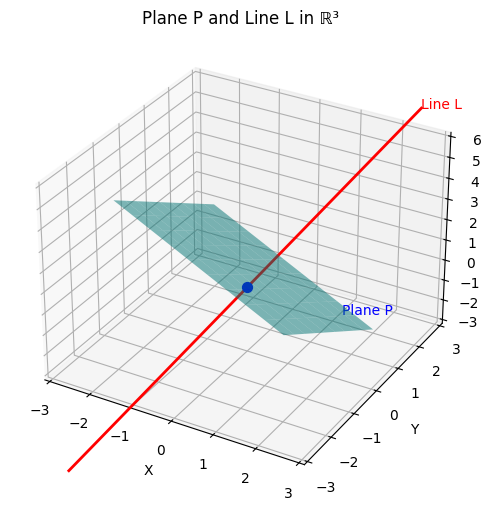

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the plane P: Example plane equation -> x + y + z = 1
xx, yy = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
zz = 1 - xx - yy  # Rearranged from x + y + z = 1

# Plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='cyan', label='Plane P')
ax.text(1.5, 1.5, -2, "Plane P", color='blue')

# Define the line L passing through origin and direction [1, 2, 3]
t = np.linspace(-2, 2, 100)
x_line = t
y_line = 2 * t
z_line = 3 * t

# Plot the line
ax.plot(x_line, y_line, z_line, color='red', linewidth=2, label='Line L')
ax.text(2, 4, 6, "Line L", color='red')

# Plot the origin as a blue dot
ax.scatter(0, 0, 0, color='blue', s=50)  # s is size

# Set axes labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Set limits
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 6])

# Show plot
plt.title("Plane P and Line L in ℝ³")
plt.show()


Now, consider the following two subspaces made up from ***P*** and ***L*** :

***P*** $ \cup $ ***L*** = All vectors in ***P*** or ***L*** or both $ \implies $ Not a subspace as not closed under addition

***P*** $ \cap $ ***L*** = All vectors in ***P*** and ***L*** $ \implies $ A subspace

Vector space requirements:
- V + W & cV are in the space
- All combinations cV + dW are in the space

Union and Intersection of any two subspaces ***S*** & ***T*** of ***R<sup>3</sup>*** :
- ***S*** $ \cup $ ***T*** is not a subspace
- ***S*** $ \cap $ ***T*** is a subspace


#### Columnspace

Consider the following matrix ***A*** :

$$
\begin{bmatrix} 1 & 1 & 2 \\ 2 & 1 & 3 \\ 3 & 1 & 4 \\ 4 & 1 & 5 \end{bmatrix}
$$

***C(A)*** denotes the columnspace of ***A*** which is a 2D subspace of ***R<sup>4</sup>*** as Col3 is sum of Col1 & Col2, thus, adds nothing new.
The columnspace is defined as all the linear combinations of columns of ***A***.

Does ***Ax = b*** have a solution for every ***b***?

No! As we have 4 equations and 3 unknowns.

$$
\begin{bmatrix} 1 & 1 & 2 \\ 2 & 1 & 3 \\ 3 & 1 & 4 \\ 4 & 1 & 5 \end{bmatrix} \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \end{bmatrix} = \begin{bmatrix} b_{1} \\ b_{2} \\ b_{3} \\ b_{4} \end{bmatrix}
$$

Which b's allow the system to be solvable? 

***Ax = b*** can be solved exactly when b is in ***C(A)***, because the column space contains all vectors which are a combination of columns of A. We can also see that we are expressing ***b*** as a weighted sum of ***A***'s columns. Thus, only those b can be achieved which are made up of some combination of columns of A.

#### Nullspace of ***A***

The space of all $ x = \begin{bmatrix} x_{1} & x_{2} & x_{3} \end{bmatrix}^{T} $ such that they are solutions to ***Ax = 0*** (when ***b = 0***) :

$$
\begin{bmatrix} 1 & 1 & 2 \\ 2 & 1 & 3 \\ 3 & 1 & 4 \\ 4 & 1 & 5 \end{bmatrix} \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

is called the Nullspace, ***N(A)*** of ***A***.

Suppose $ x = \begin{bmatrix} x_{1} & x_{2} & x_{3} \end{bmatrix}^{T} = \begin{bmatrix} c & c & -c \end{bmatrix}^{T} $ for some scalar c,

$$
\begin{bmatrix} 1 & 1 & 2 \\ 2 & 1 & 3 \\ 3 & 1 & 4 \\ 4 & 1 & 5 \end{bmatrix} \begin{bmatrix} c \\ c \\ -c \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

Thus, we can see that ***N(A)*** contains $ c\begin{bmatrix} 1 & 1 & -1 \end{bmatrix}^{T} $ and ***N(A)*** is a line in ***R<sup>3</sup>*** passing through the origin.

The solutions to ***Ax = 0*** always give a subspace. 

If ***Av = 0*** and ***Aw = 0*** then ***A(v + w) = 0***

The solutions ***x*** to ***Ax = b*** and $ b \neq 0 $, does not form a subspace as ***0*** is not included in the space.

Columnspace, ***C(A)*** : We have vectors and we have to create a subspace by taking combinations of the columns. 

Nullspace, ***N(A)*** : We have to find the vectors that create the entire subspace.

## 7. Solving ***Ax = 0*** : Pivot Variables and Special Solutions

Consider the following system of equations:

$$
x_1 + 2x_2 + 2x_3 + 2x_4 = 0 \\[0.2em]
2x_1 + 4x_2 + 6x_3 + 8x_4 = 0 \\[0.2em]
3x_1 + 6x_2 + 8x_3 + 10x_4 = 0
$$

and the allied matrix equation ***Ax = b*** :
$$
\begin{bmatrix} 1 & 2 & 2 & 2 \\ 2 & 4 & 6 & 8 \\ 3 & 6 & 8 & 10 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}
$$

We can observe the following:
1. Col2 = 2*Col1
2. Row3 = Row1 + Row2

The solutions of the system ***Ax = b*** are not changed during elimination, thus:
1. N(A) (space of all ***x*** such that ***Ax = b***) remains the same
2. C(A) (space of all combinations of columns of ***A***) changes as the columns are changed.

Performing elimination:

$$
A = \begin{bmatrix} 1 & 2 & 2 & 2 \\ 2 & 4 & 6 & 8 \\ 3 & 6 & 8 & 10 \end{bmatrix}
\xrightarrow[R_3 \rightarrow R_3 - 3R_1]{R_2 \rightarrow R_2 - 2R_2}
\begin{bmatrix} 1 & 2 & 2 & 2 \\ 0 & 0 & 2 & 4 \\ 0 & 0 & 2 & 4 \end{bmatrix}
$$

The presence of 0 in the second pivot position in Col2 shows that it was dependent on earlier columns. Also, the presence of 0 under the second pivot position shows that we can't execute a row exchange. We move on to the next column:

$$
\begin{bmatrix} 1 & 2 & 2 & 2 \\ 0 & 0 & 2 & 4 \\ 0 & 0 & 2 & 4 \end{bmatrix}
\xrightarrow{R_3 \rightarrow R_3 - R_2}
\begin{bmatrix} 1 & 2 & 2 & 2 \\ 0 & 0 & 2 & 4 \\ 0 & 0 & 0 & 0 \end{bmatrix}
$$

Matrix ***A*** is converted into the echelon (staircase) form and now, we will solve the following system:

$$
Ux = b
$$

where,

$$
U = \begin{bmatrix} 1 & 2 & 2 & 2 \\ 0 & 0 & 2 & 4 \\ 0 & 0 & 0 & 0 \end{bmatrix} 
$$

#### Rank

It is defined as the number of pivots/pivot columns (columns containing a pivot element)
For the matix ***A*** :
1. Number of pivot columns: 2, Col1 and Col3
2. Number of free columns (columns without a pivot): 2, Col1 and Col4

Therefore, Rank(A) = 2

We can assign any values to the free variables and then solve for the pivot variables.

Let $ x = \begin{bmatrix} -2 & 1 & 0 & 0 \end{bmatrix}^{T} $ or $ x = c \begin{bmatrix} -2 & 1 & 0 & 0 \end{bmatrix}^{T} $, where ***x*** is a line in N(A)

We get special solutions after assigning values to the free variables.

The system of equations, after the elimination looks like the following:

$$
x_1 + 2x_2 + 2x_3 + 2x_4 = 0 \\[0.2em]
2x_3 + 4x_4 = 0
$$

The N(A) contains all the combinations of the special solutions. 

***How many special solutions are there?***

We get 1 special solution for each free variable.

Rank(A) = Number of Pivot Variables = 2
Number of Free Variables:

$$
\# \text{Columns - Rank} \implies \# \text{Independent columns}
$$

For a $ mxn $ matrix with rank r,

$$
\text{Number of Pivot Variables:} = r \\[0.2em]
\text{Number of Free Variables:} = n - r
$$




#### Reduced Row Echelon Form, ***R***

In ***R***, we have zeroes above and below the pivots. Any row of 0s shows that the row was a combination of other rows.

Again going back to our ***U*** matrix and performing further eliminations, give us the ***R*** matrix,

$$
U = \begin{bmatrix} 1 & 2 & 2 & 2 \\ 0 & 0 & 2 & 4 \\ 0 & 0 & 0 & 0 \end{bmatrix}
\xrightarrow{R_1 \rightarrow R_1 - R_2}
\begin{bmatrix} 1 & 2 & 0 & -2 \\ 0 & 0 & 2 & 4 \\ 0 & 0 & 0 & 0 \end{bmatrix}
\xrightarrow{R_2 \rightarrow \frac{1}{2} R_2}
\begin{bmatrix} 1 & 2 & 0 & -2 \\ 0 & 0 & 1 & 2 \\ 0 & 0 & 0 & 0 \end{bmatrix}
$$

Now,

$$
Ax = 0 \xrightarrow[\text{Row-Echelon Form}]{\text{Elimination}} Ux = 0 \xrightarrow{\text{Reduced Row-Echelon Form}} Rx = 0 \implies \text{All solutions remain the same}
$$

We can see that ***I*** appears in the pivot columns, thus we can re-write the ***R*** in the following manner:

$$
\begin{bmatrix} I & F \\ 0 & 0 \end{bmatrix} 
$$

where, ***I*** are the pivot columns and ***F*** are the free columns, followed by the row of zeroes. We have $ r $ pivot rows and columns and $ n-r $ free columns.

Now we will construct the null space matrix, ***N*** (where comlumns of ***N*** are the special solutions) such that ***RN = 0***

$$
N = \begin{bmatrix} -F \\ I \end{bmatrix}
$$

and for the system,

$$
Rx = 0 \implies \begin{bmatrix} I & F \end{bmatrix} \begin{bmatrix} x_{pivot} \\ x_{free} \end{bmatrix} = 0
$$

$$
\implies x_{pivot} = -Fx_{free}
$$

which is equivalent to,

$$
\begin{bmatrix} I & F \end{bmatrix} \begin{bmatrix} -F \\ I \end{bmatrix} = 0
$$

Thus, we can conclude, that there exists a similarity between the RREF of ***A*** and the ***N(A)***. In the ***N(A)*** the free part appears with a negative while the pivot part appears as it is.

Following from the previous example, we can see the RREF of ***A*** and ***N(A)*** :
$$
R = \begin{bmatrix} I & F \\ 0 & 0 \end{bmatrix} \text{and  } N(A) = \begin{bmatrix} -F \\ I \end{bmatrix}
$$

## 8. Solving ***Ax = b***: Row Reduced form ***R***

Consider the following augmented matrix system:

$$
\left[
\begin{array}{c c c c|c}
1 & 2 & 2 & 2 & b_{1} \\
2 & 4 & 6 & 8 & b_{2} \\
3 & 6 & 8 & 10 & b_{3} \\
\end{array}
\right]

\xrightarrow[R_{3} \xrightarrow{} R_{3} - 3R_{1}]{R_{2} \xrightarrow{} R_{2} - 2R_{1}}

\left[
\begin{array}{c c c c|c}
1 & 2 & 2 & 2 & b_{1} \\
0 & 0 & 2 & 4 & b_{2} - 2b_{1} \\
0 & 0 & 2 & 4 & b_{3} - 3b_{1} \\
\end{array}
\right]

\xrightarrow{R_{3} \xrightarrow{} R_{3} - R_{2}}

\left[
\begin{array}{c c c c|c}
1 & 2 & 2 & 2 & b_{1} \\
0 & 0 & 2 & 4 & b_{2} - 2b_{1} \\
0 & 0 & 0 & 0 & b_{3} - b_{2} - b_{1} \\
\end{array}
\right]
$$

Here, we can observe that Col1 and Col3 are the pivot columns and Col2 and Col4 are the free columns. Now, since the last row is a ***0*** row, it follows that the corresponsing RHS of the augmented matrix should also be 0,

$$
\implies b_{3} - b_{2} - b_{1} = 0 \implies b_{3} = b_{2} + b_{1}
$$

which is what we see, as Row3 is a combination of Row1 and Row2.

#### Solvability Condition for ***Ax = b***

***Ax = b*** is solvable when ***b*** is in the columnspace of ***A***, ***C(A)***. If a combination of rows of ***A*** gives zero row, then the same combination of entries of ***b*** must give zero.

To find the complete solution to ***Ax = b***, where $ b = \begin{bmatrix} 1 & 5 & 6 \end{bmatrix}^{T} $, consider the following matrix system:

$$
\left[
\begin{array}{c c c c|c}
1 & 2 & 2 & 2 & 1 \\
2 & 4 & 6 & 8 & 5 \\
3 & 6 & 8 & 10 & 6 \\
\end{array}
\right]

\xrightarrow[R_{3} \xrightarrow{} R_{3} - 3R_{1}]{R_{2} \xrightarrow{} R_{2} - 2R_{1}}

\left[
\begin{array}{c c c c|c}
1 & 2 & 2 & 2 & 1 \\
0 & 0 & 2 & 4 & 3 \\
0 & 0 & 2 & 4 & 3 \\
\end{array}
\right]

\xrightarrow{R_{3} \xrightarrow{} R_{3} - R_{2}}

\left[
\begin{array}{c c c c|c}
1 & 2 & 2 & 2 & 1 \\
0 & 0 & 2 & 4 & 3 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]

\xrightarrow[R_{2} \xrightarrow{} \frac{1}{2}R_{2}]{R_{1} \xrightarrow{} R_{1} - R_{2}}

\left[
\begin{array}{c c c c|c}
1 & 2 & 0 & -2 & -2 \\
0 & 0 & 1 & 2 & \frac{3}{2} \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]

$$

which translates to the following system of equations:

$$
x_{1} + 2x_{2} - 2x_{4}  = -2
$$

$$
x_{3} + 2x_{4}  = \frac{3}{2}
$$

$$
0  = 0
$$

1. Find x<sub>Particular</sub>

Set all free variables to zero and then solve ***Ax = b*** for pivot variables. $ \implies  x_{2} = x_{4} = 0 $ 

$$
x_{1}  = -2
$$

$$
x_{3} = \frac{3}{2}
$$

$$
\implies x_{Particular} = \begin{bmatrix} -2 \\ 0 \\ 3/2 \\ 0 \end{bmatrix}
$$

2. Add x<sub>Nullspace</sub>

Finding the Nullspace, ***N(A)***, which is the space of all combinations of ***x*** such that ***Ax = 0***

$$

\begin{bmatrix}
1 & 2 & 0 & -2 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}

\begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
\end{bmatrix}
$$

For two free variables, we will have two vectors that will form the ***N(A)***, which are, 
$
\begin{bmatrix}
-2 & 1 & 0 & 0
\end{bmatrix}^{T}
$
and
$
\begin{bmatrix}
2 & 0 & -2 & 1
\end{bmatrix}^{T}
$
as,

$$
\begin{bmatrix}
1 & 2 & 0 & -2 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix}
-2 \\ 1 \\ 0 \\ 0
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
1 & 2 & 0 & -2 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix}
2 \\ 0 \\ -2 \\ 1
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

Thus,

$$
x_{Nullspace} = c_1\begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \end{bmatrix} + c_2\begin{bmatrix} 2 \\ 0 \\ -2 \\ 1 \end{bmatrix}
$$

3. The full solution of ***Ax = b*** will be,
$$
x_{Full} = x_{Particular} + x_{Nullspace}
$$

as

$$
Ax_{Full} = Ax_{Particular} + Ax_{Nullspace} \implies Ax_{Full} = b + 0 \implies Ax_{Full} = b
$$

Thus,

$$
x_{Full} = \underbrace{\begin{bmatrix} -2 \\ 0 \\ 3/2 \\ 0 \end{bmatrix}}_{x_{Particular}} + \underbrace{c_1\begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \end{bmatrix} + c_2\begin{bmatrix} 2 \\ 0 \\ -2 \\ 1 \end{bmatrix}}_{x_{Nullspace}}
$$

Note: $x_{Full}$ is not a subspace as it doesn't pass through ***0***, it is a plane that is shifted by $x_{Particular}$.

#### Rank of Matrices

Consider a $m\text{x}n$ matrix ***A*** of rank $r$ where,
- $r \le m$ as each row can have atmost 1 pivot
- $r \le n$ as each column can have atmost 1 pivot

1. Full Column Rank $\implies r = n$ 

$$
\begin{bmatrix} 1 & 3 \\ 2 & 1 \\ 6 & 1 \\ 5 & 1 \\ \end{bmatrix} \equiv \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \\ 0 & 0 \\ \end{bmatrix}
$$

- No free variables
- ***N(A)*** = Zero vector as no free variables, thus, no special solutions to construct the nullspace.
- Solution to ***Ax = b***: Only particular solution. The solution will be uniques, if it exists.

2. Full Row Rank $\implies r = m$ 

$$
\begin{bmatrix} 1 & 2 & 6 & 5 \\ 3 & 1 & 1 & 1 \end{bmatrix} \equiv \begin{bmatrix} 1 & 0 & - & - \\ 0 & 1 & - & - \end{bmatrix}
$$

- Can solve ***Ax = b*** for every ***b*** as there will be no zero rows, thus, no requirements on ***b*** for solvability.
- $n-r$ free variables

3. Full Rank $\implies r = m = n$

$$
\begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix}
$$

- Such matrices are invertible
- RREF will be ***I***
- Solve for every ***b*** as there are no zero rows
- Solution to ***Ax = b***: Only particular solution. The solution will be uniques, if it exists.
- ***N(A)*** = Zero vector as no free variables, thus, no special solutions to construct the nullspace.


#### Summary
1. $ r = m = n $; $R = I$ $\xrightarrow{}$ 1 Solution
2. $ r = n < m $; $R = \begin{bmatrix} I \\ 0 \end{bmatrix} \xrightarrow{}$ 0 or 1 Solution
3. $ r = m < n $; $R = \begin{bmatrix} I & F \end{bmatrix} \xrightarrow{}$ $\infty$ Solution
4. $ r <m, r < n $; $R = \begin{bmatrix} I & F \\ 0 & 0 \end{bmatrix} \xrightarrow{}$ 0 or $\infty$ Solution



## 9. Independence, Basis and Dimensions

Suppose $A_{mn}$ with $m<n$, then there are non-zero solutions to ***Ax = 0*** (more unknowns than equations).

Reason: There will be free variables to which we can assign any value and then solve for the pivot variables.

#### Independence
Vectors $x_{1}, x_{2}, x_{3},...,x_{n}$ are independent if no combination gives the zero vector, except for the zero combination.

$$
c_{1}x_{1} + c_{2}x_{2} + c_{3}x_{3} +...+c_{n}x_{n} \ne 0 \text{ with } c_{i} \ne 0 
$$

Consider the following system:

$$
\begin{bmatrix} 2 & 1 & 2.5 \\ 1 & 2 & -1 \end{bmatrix}
\begin{bmatrix} c_{1} \\ c_{2} \\ c_{3} \end{bmatrix} = 
\begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

The columns of matrix are always dependent if there is anything except for the zero vector in the nullspace of the matrix.

$$
\implies c_{1} \begin{bmatrix} 2 \\ 1 \end{bmatrix} + c_{2} \begin{bmatrix} 1 \\ 2 \end{bmatrix} + c_{3} \begin{bmatrix} 2.5\\ -1 \end{bmatrix} = 0 \xrightarrow{} \text{dependent}
$$

$ \implies $ When $V_{1}, V_{2}, V_{3},...,V_{n}$ are columns of ***A*** and we are in $m$-dimensional space, the columns $(V_{1}, V_{2}, V_{3},...,V_{n})$ of ***A*** are independent if ***N(A)*** is only the zero vector.

$\implies$ Rank(***A***) = $n$, ***N(A)*** = {0}, no free variables. 

$\implies$ They are dependent if ***AC = 0*** for some non-zero ***C*** $\implies$ Rank(A) < $n$, there will be free variables.

#### Span
Spanning a space means filling the entire space. It is done by taking all the possible linear combinations of the columns of ***A***.

Vectors $V_{1}, V_{2}, V_{3},...,V_{n}$ span a space if it contains all combinations of those vectors.

#### Basis
For a space $S$, the sequence of vectors $V_{1}, V_{2}, V_{3},...,V_{n}$ forms a basis if:
1. The vectors are independent
2. The vectors span the space

The number of vectors $V$ should be just enough for the space $S$. 
- if they are less, then they won't span $S$
- if they are more, then they won't be independent

Space is $\mathbb{R}^3$

One basis is: $ \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} $

For $\mathbb{R}^n$: $n$ vectors give the basis if the $n$ x $n$ matrix with those columns is invertible.

$\xrightarrow{}$ Are $ \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}, \begin{bmatrix} 2 \\ 2 \\ 5 \end{bmatrix} $ basis for any space?

The vectors span a space (plane) in $\mathbb{R}^3$, thus, they are a basis for that plane.

#### Dimension
- The basis for a space are not unique.
- Given a space, every basis for that space has same number of vectors and that number is known as the dimension of that space.

For a matrix ***A*** with rank $r$,
- Rank(A) = Number of pivot columns 
- Dimension of ***C(A)*** = $r$
- Dimension of ***N(A)*** = Number of free columns = $\max{(m,n)} - r$

## 10. The Four Fundamental Subspaces

Consider the following matrix ***A*** of size $m$ x $n$,

$$
\begin{bmatrix} a_{11} & a_{12} & a_{13} & ... & a_{1n} \\ a_{21} & a_{22} & a_{23} & ... & a_{2n} \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ a_{m1} & a_{m2} & a_{m3} & ... & a_{mn} \end{bmatrix}
$$

1. Columnspace, ***C(A)*** is in $\mathbb{R}^m$
2. Nullspace, ***N(A)*** is in $\mathbb{R}^n$
3. Rowspace: All combinations of rows of ***A*** $\equiv$ All combinations of columns of ***A<sup>T</sup>*** $\implies$ Rowspace(***A***) = ***C(A<sup>T</sup>)*** in $\mathbb{R}^n$
4. Nullspace of ***A<sup>T</sup>*** = ***N(A<sup>T</sup>)*** $\equiv$ Left Nullspace of ***A*** in $\mathbb{R}^m$

\begin{array}{|c|c|c|}
\hline
\text{Subspace} & \text{Basis}              & \text{Dimension} \\
\hline
C(A)            & \text{Pivot Columns}      & r  \\
C(A^{T})        & \text{First r rows of R}  & r  \\
N(A)            & \text{Special Solutions}  & n-r  \\
N(A^{T})        &                           & m-r  \\
\hline
\end{array}

Consider the following matrix ***A***,

$$
A = \begin{bmatrix} 
1 & 2 & 3 & 1 \\
1 & 1 & 2 & 1 \\
1 & 2 & 3 & 1 \\
\end{bmatrix}
\xrightarrow{Elimination}
\begin{bmatrix} 
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix} = R
$$

***C(R)*** $\neq$ ***C(A)*** as we have performed row operations, which modify the columnspace but preserve the rowspace. ***C(R)*** and ***C(A)*** have different columnspace but same rowspace. Basis for rowspace is the first $r$ rows of ***R***

Let us look at ***N(A<sup>T</sup>)***

Vectors ***y*** such that ***A<sup>T</sup>y = 0***

$\implies$ ***(A<sup>T</sup>y)<sup>T</sup> = 0<sup>T</sup>*** 

$\implies$ ***y<sup>T</sup>A = 0<sup>T</sup>*** 

Here ***y<sup>T</sup>*** is a row vector multiplying ***A*** form the left, that is why, its called the left nullspace.

For nice, square matrices, if we perform the same operations on ***I*** as we performed on ***A*** to convert it into ***R***, which is equal to ***I*** for nice, square matrices, we will get a matrix ***E*** that will give us the basis for ***N(A<sup>T</sup>)***.

$$
\begin{bmatrix} E \end{bmatrix} 

\left[
\begin{array}{c|c}
A & I
\end{array}
\right]

=

\left[
\begin{array}{c|c}
R & E
\end{array}
\right]

$$

Consider the following system:

$$
\underbrace{\begin{bmatrix} -1 & 2 & 0 \\ 1 & -1 & 0 \\ -1 & 0 & 1 \\ \end{bmatrix}}_{E}
\underbrace{\begin{bmatrix} 
1 & 2 & 3 & 1 \\
1 & 1 & 2 & 1 \\
1 & 2 & 3 & 1 \\
\end{bmatrix}}_{A}
\xrightarrow{}
\underbrace{\begin{bmatrix} 
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}}_{R}
$$

Therefore, the row vector ***y<sup>T</sup>*** such that ***y<sup>T</sup>A = 0*** is the row of ***E*** that gives us the 0 row in ***R***, and this is the basis for ***N(A<sup>T</sup>)***.

#### New Vector Space, M

Consider the space ***M*** of all $3$ x $3$ matrices which obeys the following rules of a valid vector space:
- If ***A*** $\in$ ***M*** and ***B*** $\in$ ***M*** then ***A+B*** $\in$ ***M***
- If ***c*** is some scalar and ***A*** $\in$ ***M*** then ***cA*** $\in$ ***M***

Subspaces of ***M***
- Upper Triangular Matrices, ***U***
- Symmetric Matrices, ***S***
- Diagonal Matrices, ***D*** = ***U*** $\cap$ ***S***

Dimension of ***D*** is 3 and we need three independent matrices which must produce all the matrices in ***M*** with their combinations.

***M<sub>1</sub>, M<sub>2</sub>, M<sub>3</sub>*** are those three independent, ***M*** spanning matrices and they form a basis.

$$ 
M_{1} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}

M_{2} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 3 & 0 \\ 0 & 0 & 0 \end{bmatrix} 

M_{3} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 7 \end{bmatrix}
$$

## 11. Matrix Spaces, Rank 1 Matrices and Small World Graphs

Basis for ***M*** = all $3$ x $3$ matrices $ \implies $ we need 9 numbers to span ***M*** $\implies$ dim(***M***) = 9, ***M*** is a 9-dimensional space and the basis are:

$$
\begin{bmatrix} 
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix},
\begin{bmatrix} 
0 & 1 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix},
\begin{bmatrix} 
0 & 0 & 1 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix},
...,
\begin{bmatrix} 
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

dim(***S***) = 6 & dim(***U***) = 6

- Sum
***S + U*** = any element of ***S*** + any element of ***U*** = all $3$ x $3$ matrices $\implies$ dim(***S + U***) = 9
- Intersection
***S $\cap$ U*** = Diagonal $3$ x $3$ matrices $\implies$ dim(***S $\cap$ U***) = 3

$$\underbrace{dim(S)}_{6} + \underbrace{dim(U)}_{6} = \underbrace{dim(S+U)}_{9} + \underbrace{dim(S\cap U)}_{3}$$

Therefore, for a vector space ***S*** and its subspaces ***S<sub>1</sub>*** and ***S<sub>2</sub>***, the following relation holds:

$$
\implies dim(S_{1}) + dim(S_{2}) = dim(S_{1}+S_{2}) + dim(S_{1}\cap S_{2})
$$ 


#### Rank 1 Matrices

Let $ A_{2\text{x}3} = \begin{bmatrix} 1 & 4 & 5 \\ 2 & 4 & 10 \end{bmatrix} $ be a rank 1 matrix

dim(***C(A)***) = rank = dim(***R(A)***) = dim(***C(A<sup>T</sup>)***) = 1

Every rank 1 matrix can be decomposed into two column vectors: 

$$ 
A_{2\text{x}3} = \begin{bmatrix} 1 & 4 & 5 \\ 2 & 4 & 10 \end{bmatrix} = 
\begin{bmatrix} 1 \\ 2 \end{bmatrix}_{2\text{x}1} 
\begin{bmatrix} 1 & 4 & 5 \end{bmatrix}_{1\text{x}3} =
\underbrace{U}_{\text{Column Vector}}
\overbrace{V^{T}}^{\text{Row Vector}}
$$

#### Insert Example

#### Graph
These are bunch of nodes and edges connecting those nodes.

Consider the following graph with 5 nodes and 6 edges.

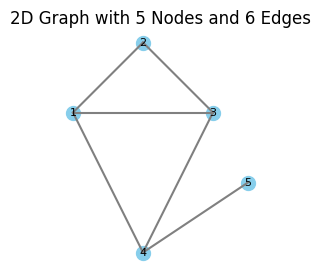

In [7]:
import matplotlib.pyplot as plt

# Define node coordinates (x, y) manually
nodes = {
    1: (0, 0),
    2: (2, 2),
    3: (4, 0),
    4: (2, -4),
    5: (5, -2),
}

# Define edges (pairs of connected node numbers)
edges = [(1, 2), (2, 3), (1, 3), (1, 4), (3, 4), (4, 5)]

# Plot nodes
plt.figure(figsize=(3, 3))
for node, (x, y) in nodes.items():
    plt.scatter(x, y, s=100, color='skyblue')
    plt.text(x, y, str(node), fontsize=8, ha='center', va='center')

# Plot edges
for start, end in edges:
    x_coords = [nodes[start][0], nodes[end][0]]
    y_coords = [nodes[start][1], nodes[end][1]]
    plt.plot(x_coords, y_coords, color='gray')

# Final plot settings
plt.title("2D Graph with 5 Nodes and 6 Edges")
plt.axis('equal')
plt.axis('off')
plt.show()


Some $5$ x $6$ matrix holds all the information about this graph.

Graphs are used to find the distance between two nodes. Using short-cuts, that distance can be reduced dramatically.

## 12. Graphs, Networks and Incidence Matrices

#### Graph: Nodes and Edges
Consider the following graph with 
$$
n = 4 \text{ nodes = columns}
$$
$$
m = 5 \text{ edges = rows}
$$

Keeping the convention that an edge leaving a node is negative and an edge arriving at a node is positive, we can construct the following graph:

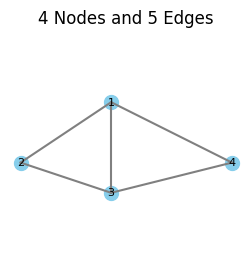

In [8]:
import matplotlib.pyplot as plt

# Define node coordinates (x, y) manually
nodes = {
    1: (5, 5),
    2: (2, 3),
    3: (5, 2),
    4: (9, 3),
}

# Define edges (pairs of connected node numbers)
edges = [(1, 2), (2, 3), (1, 3), (1, 4), (3, 4)]

# Plot nodes
plt.figure(figsize=(3, 3))
for node, (x, y) in nodes.items():
    plt.scatter(x, y, s=100, color='skyblue')
    plt.text(x, y, str(node), fontsize=8, ha='center', va='center')

# Plot edges
for start, end in edges:
    x_coords = [nodes[start][0], nodes[end][0]]
    y_coords = [nodes[start][1], nodes[end][1]]
    plt.plot(x_coords, y_coords, color='gray')

# Final plot settings
plt.title("4 Nodes and 5 Edges")
plt.axis('equal')
plt.axis('off')
plt.show()

Creating the corresponding Incidence matrix for the above graph:

$$
A = \begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 
\end{bmatrix}
$$

- Row1, Row2, Row3 are linearly dependent $(R_{1} + R_{2} + R_{3})$. $\therefore$ a loop means the rows (edges) are linearly dependent.
- Each row have only 2 non-zero elements, rest are 0, $\therefore$ the matrix ***A*** is sparse.
- Finding the nullspace of ***A*** $\implies$ Solve ***Ax = 0***

Let $x$ = $\begin{bmatrix} x_{1} & x_{2} & x_{3} & x_{4} \end{bmatrix}^{T} $ be the potentials at the nodes. $ Ax $ gives us the potential differences across the edges.

$$
Ax = \begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 
\end{bmatrix}

\begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} 
\end{bmatrix} = 

0

\implies

\begin{bmatrix}
x_{2} - x_{1} \\
x_{3} - x_{2} \\
x_{3} - x_{1} \\
x_{4} - x_{1} \\
x_{4} - x_{3} 
\end{bmatrix} = 

\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 
\end{bmatrix}

$$

$ x = \begin{bmatrix} 1 \\ 1 \\ 1\\ 1 \end{bmatrix} $ is a solution of ***Ax = 0***, and it is also a basis for ***N(A)***.

***N(A)*** is $ c \begin{bmatrix} 1 \\ 1 \\ 1\\ 1 \end{bmatrix} $ and dim(***N(A)***) = 1, a line in $\mathbb{R}^{5\text{x}4}$

Potential difference if the entity that makes things flow, and thus, if all potential differences are zero, then nothing moves.

$\therefore$ we fix one of the nodes. We make node 4 grounded and then find rest of the potentials.

Rank(***A***) = 3, any three columns are independent.

Now, finding the N(***A<sup>T</sup>***), consider $A^{T}y = 0$

$$
A^{T}y = \begin{bmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & -1 \\
0 & 0 & 0 & 1 & 1
\end{bmatrix}

\begin{bmatrix}
y_{1} \\
y_{2} \\
y_{3} \\
y_{4} \\
y_{5} 
\end{bmatrix} = 

\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 
\end{bmatrix}
$$

dim(***N(A<sup>T</sup>)***) = $ m - r = 5 - 3 = 2 $

$$
\overbrace{x = \begin{bmatrix} x_{1} & x_{2} & x_{3} & x_{4} \end{bmatrix}^{T}}^{\text{Potential at Nodes}}
\xrightarrow[\text{with A}]{\text{Multiply}}
\underbrace{x_{i}-x_{j}}_{\text{Potential diff between two nodes}}
\xrightarrow[\text{Ohm's Law}]{\text{Matrix C of Physical Quantities}}
\overbrace{\begin{array}{c} \text{$y_{1}$, $y_{2}$, $y_{3}$} \\ \text{$y_{4}$, $y_{5}$} \end{array}}^{\text{Currents on Edges }}
\xrightarrow[\text{by $A^{T}$}]{\text{Multiply}}
A^{T}y = 0, \text{Kirchoff's Current Law}
$$

Evaluating $A^{T}y$ gives the following system of equations:

$$
-y_{1} - y_{3} - y_{4} = 0
$$

$$
y_{1} - y_{2} = 0
$$

$$
y_{2} + y_{3} - y_{5} = 0
$$

$$
y_{4} + y_{5} = 0
$$

Basis of ***N(A<sup>T</sup>)*** $\begin{bmatrix} 1 \\ 1 \\ -1 \\ 0 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 0 \\ 1 \\ -1 \\ 1 \end{bmatrix}$

Matrix ***A*** describes the graph and ***x*** is the potential at individual nodes.

***Ax*** gives the potential difference, let $ e = Ax $

Using Ohm's law, $ y = Ce $ where ***C*** is the coefficient matrix of physical quantities, gives the current in each edge.


## 13. Quiz Review

$ A^{T}y = f$ gives the Kirchoff's Current Law

$$ \implies A^{T}y = f $$

$$ \implies A^{T}Ce = f \text{ (as $y = Ce$)}$$

$$\implies A^{T}CAx = f \text{ (as $e = Ax$)}$$

NOTE: Euler's formula $\implies \#nodes - \#edges + \#loops = 1 $



## 14. Orthogonal Vectors and Subspaces